In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [6]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [7]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [8]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [9]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [10]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [11]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

In [12]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))


history = model.fit(x_train,
                    steps_per_epoch=500,
                    epochs=2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

1D Convolutional Model

In [ ]:
# Definizione dell'architettura della rete neurale

num_classes = 2
input_channels = 87

model = tf.keras.Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(1, input_channels)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model.compile(optimizer='rmsprop', loss='mae')

# Training 

# X_train = X_train.reshape(-1, input_length, input_channels)

num_epochs = 20
batch_size = 8
model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size)

# Evaluation of the model

# X_test = X_test.reshape(-1, input_length, input_channels)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Utilizzo del modello per effettuare predizioni
predictions = model.predict(x_test)


NameError: name 'tf' is not defined

1D CN

In [ ]:
model = Sequential()
model.add(layers.Conv1D(8, 24, activation='relu', input_shape=(None, x_train.shape[-1])))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 12, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(8, 6, activation='relu'))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mae')
history = model.fit(x_train,
                    y_train,
                    steps_per_epoch=350,
                    epochs=20)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\irene\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv1d_10' (type Conv1D).
    
    Negative dimension size caused by subtracting 24 from 1 for '{{node sequential_4/conv1d_10/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4/conv1d_10/Conv1D/ExpandDims, sequential_4/conv1d_10/Conv1D/ExpandDims_1)' with input shapes: [2,1,1,86], [1,24,86,8].
    
    Call arguments received by layer 'conv1d_10' (type Conv1D):
      • inputs=tf.Tensor(shape=(2, 1, 86), dtype=float32)


GRU

Create training and validation and test data

In [13]:
from sklearn.model_selection import train_test_split

def trainTestData_2 (features, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_1, x_test, y_1, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
    results = pd.DataFrame(columns = perfInd)
    return x_train, x_test, y_train, y_test, x_val, y_val, results

In [14]:
x_train, x_test, y_train, y_test, x_val, y_val, results = trainTestData_2 (ft, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_val = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_val = y_test.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

print(np.shape(x_train))
print(np.shape(y_train))

(313, 1, 86)
(313,)


1 layer (optimizer SGD)

Epoch 1/200
63/63 [==============================] - 3s 11ms/step - loss: 0.8482 - accuracy: 0.3099 - val_loss: 0.7889 - val_accuracy: 0.3750
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.4058 - val_loss: 0.7253 - val_accuracy: 0.5476
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.7147 - accuracy: 0.5623 - val_loss: 0.6716 - val_accuracy: 0.6845
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6262 - val_loss: 0.6253 - val_accuracy: 0.7560
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.6997 - val_loss: 0.5863 - val_accuracy: 0.8155
Epoch 6/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5833 - accuracy: 0.7540 - val_loss: 0.5527 - val_accuracy: 0.8274
Epoch 7/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7700 - val_loss: 0.5241 - val_accuracy: 0.8214
Epoch 8/200


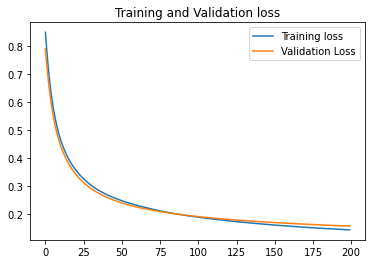

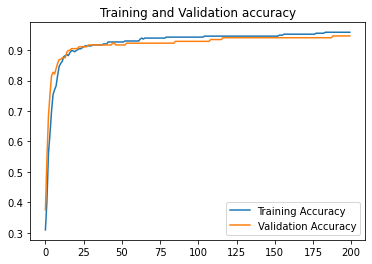

6/6 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9464
Test Loss: 0.15716366469860077
Test Accuracy: 0.9464285969734192


In [18]:
from keras import optimizers


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

#Definisco l'ottimizzatore con il learning rate iniziale
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
decay_rate = 0.1  # Tasso di decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 32)                11520     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


In [44]:
from keras import optimizers


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

#Definisco l'ottimizzatore con il learning rate iniziale
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
decay_rate = 0.1  # Tasso di decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'],callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

TypeError: Invalid keyword argument(s) in `compile()`: ({'callbacks'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

1 layer (optimizer Adam)

Epoch 1/200
63/63 [==============================] - 3s 12ms/step - loss: 0.7553 - accuracy: 0.4058 - val_loss: 0.7271 - val_accuracy: 0.4643
Epoch 2/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5431 - val_loss: 0.6704 - val_accuracy: 0.5833
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6312 - accuracy: 0.6645 - val_loss: 0.6212 - val_accuracy: 0.6845
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7540 - val_loss: 0.5790 - val_accuracy: 0.7440
Epoch 5/200
63/63 [==============================] - 0s 5ms/step - loss: 0.5370 - accuracy: 0.7732 - val_loss: 0.5426 - val_accuracy: 0.8095
Epoch 6/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4988 - accuracy: 0.7987 - val_loss: 0.5097 - val_accuracy: 0.8452
Epoch 7/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8339 - val_loss: 0.4802 - val_accuracy: 0.8512
Epoch 8/200


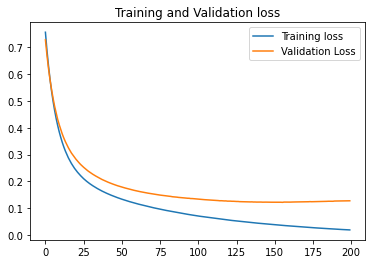

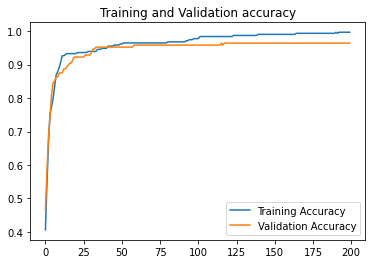

6/6 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9643
Test Loss: 0.12789776921272278
Test Accuracy: 0.9642857313156128


In [17]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 32)                11520     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


1 layer (optimizer RMS)

Epoch 1/200
63/63 [==============================] - 2s 10ms/step - loss: 0.6427 - accuracy: 0.6230 - val_loss: 0.5912 - val_accuracy: 0.7143
Epoch 2/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.7412 - val_loss: 0.5456 - val_accuracy: 0.7619
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7891 - val_loss: 0.5041 - val_accuracy: 0.8214
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5032 - accuracy: 0.8243 - val_loss: 0.4673 - val_accuracy: 0.8452
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8626 - val_loss: 0.4342 - val_accuracy: 0.8690
Epoch 6/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.8818 - val_loss: 0.4045 - val_accuracy: 0.8810
Epoch 7/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.9010 - val_loss: 0.3776 - val_accuracy: 0.8869
Epoch 8/200


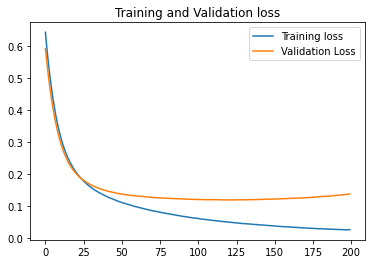

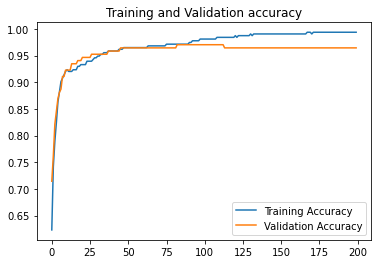

6/6 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.9643
Test Loss: 0.13782340288162231
Test Accuracy: 0.9642857313156128


In [111]:
from keras import optimizers


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                11520     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
63/63 [==============================] - 2s 9ms/step - loss: 0.4289 - accuracy: 0.8498 - val_loss: 0.3117 - val_accuracy: 0.9226
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2595 - accuracy: 0.9169 - val_loss: 0.2292 - val_accuracy: 0.9405
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9329 - val_loss: 0.1907 - val_accuracy: 0.9405
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9489 - val_loss: 0.1682 - val_accuracy: 0.9464
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.1303 - accuracy: 0.9585 - val_loss: 0.1549 - val_accuracy: 0.9583
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9649 - val_loss: 0.1500 - val_accuracy: 0.9464
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9617 - val_loss: 0.1421 - val_accuracy: 0.9643
Epoch 8/200
6

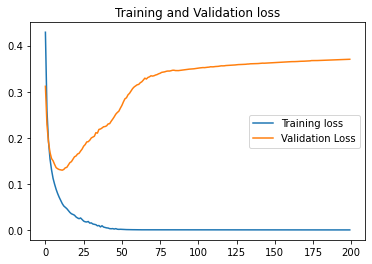

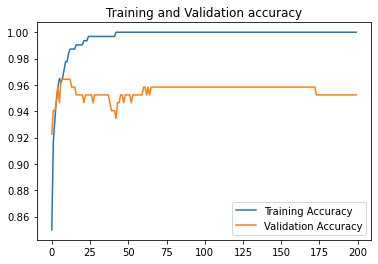

6/6 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.9524
Test Loss: 0.3702853322029114
Test Accuracy: 0.9523809552192688


In [19]:
from keras import optimizers


model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2 layers 

Epoch 1/600
123/123 [==============================] - 4s 9ms/step - loss: 0.7110 - accuracy: 0.4061 - val_loss: 0.6885 - val_accuracy: 0.5298
Epoch 2/600
123/123 [==============================] - 1s 5ms/step - loss: 0.6897 - accuracy: 0.4898 - val_loss: 0.6678 - val_accuracy: 0.6667
Epoch 3/600
123/123 [==============================] - 1s 4ms/step - loss: 0.6698 - accuracy: 0.6469 - val_loss: 0.6482 - val_accuracy: 0.7798
Epoch 4/600
123/123 [==============================] - 1s 4ms/step - loss: 0.6511 - accuracy: 0.7143 - val_loss: 0.6301 - val_accuracy: 0.8095
Epoch 5/600
123/123 [==============================] - 1s 4ms/step - loss: 0.6335 - accuracy: 0.7796 - val_loss: 0.6129 - val_accuracy: 0.8512
Epoch 6/600
123/123 [==============================] - 1s 4ms/step - loss: 0.6166 - accuracy: 0.8245 - val_loss: 0.5965 - val_accuracy: 0.8571
Epoch 7/600
123/123 [==============================] - 1s 4ms/step - loss: 0.6006 - accuracy: 0.8449 - val_loss: 0.5808 - val_accuracy: 0.8750

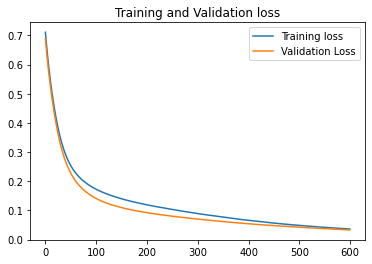

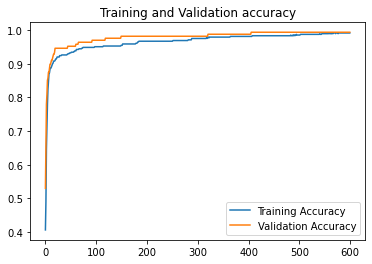

3/3 [==============================] - 1s 3ms/step - loss: 0.0367 - accuracy: 0.9857
Test Loss: 0.036729756742715836
Test Accuracy: 0.9857142567634583


In [38]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]),return_sequences=True))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

#Definisco l'ottimizzatore con il learning rate iniziale
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
decay_rate = 0.1  # Tasso di decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=4, epochs=600, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)





1 layer + Dropout (SGD)

Epoch 1/180
63/63 [==============================] - 3s 11ms/step - loss: 0.9630 - accuracy: 0.2907 - val_loss: 0.9462 - val_accuracy: 0.2976
Epoch 2/180
63/63 [==============================] - 0s 5ms/step - loss: 0.8362 - accuracy: 0.4121 - val_loss: 0.8734 - val_accuracy: 0.3393
Epoch 3/180
63/63 [==============================] - 0s 4ms/step - loss: 0.7766 - accuracy: 0.4409 - val_loss: 0.8093 - val_accuracy: 0.4583
Epoch 4/180
63/63 [==============================] - 0s 5ms/step - loss: 0.7458 - accuracy: 0.5559 - val_loss: 0.7486 - val_accuracy: 0.5893
Epoch 5/180
63/63 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5879 - val_loss: 0.6937 - val_accuracy: 0.6667
Epoch 6/180
63/63 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6294 - val_loss: 0.6458 - val_accuracy: 0.7202
Epoch 7/180
63/63 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6613 - val_loss: 0.6084 - val_accuracy: 0.7381
Epoch 8/180


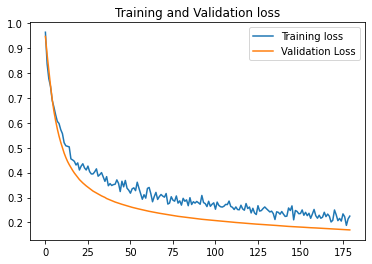

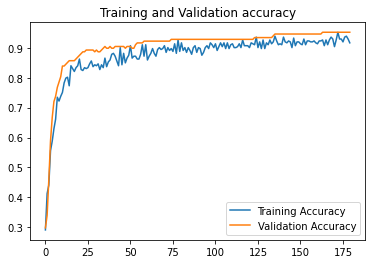

6/6 [==============================] - 0s 6ms/step - loss: 0.1702 - accuracy: 0.9524
Test Loss: 0.17015111446380615
Test Accuracy: 0.9523809552192688


In [68]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

#optimizer = optimizers.Adam(learning_rate=0.0001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

#Definisco l'ottimizzatore con il learning rate iniziale
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
decay_rate = 0.1  # Tasso di decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

# Compilazione del modello
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=180, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [42]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_49 (GRU)                (None, None, 32)          11520     
                                                                 
 gru_50 (GRU)                (None, 16)                2400      
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 13,937
Trainable params: 13,937
Non-trainable params: 0
_________________________________________________________________


1 layer with dropout (Adam)

Epoch 1/200
63/63 [==============================] - 3s 8ms/step - loss: 0.6701 - accuracy: 0.6262 - val_loss: 0.6225 - val_accuracy: 0.7262
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.6248 - accuracy: 0.6422 - val_loss: 0.5881 - val_accuracy: 0.7738
Epoch 3/200
63/63 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.6869 - val_loss: 0.5593 - val_accuracy: 0.7798
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6933 - val_loss: 0.5324 - val_accuracy: 0.8036
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7604 - val_loss: 0.5079 - val_accuracy: 0.8095
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7508 - val_loss: 0.4866 - val_accuracy: 0.8214
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.7732 - val_loss: 0.4653 - val_accuracy: 0.8274
Epoch 8/200
6

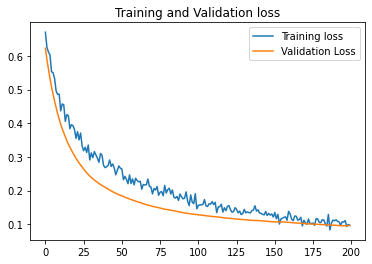

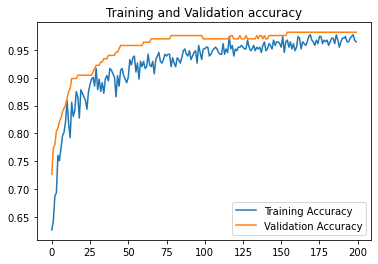

6/6 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9821
Test Loss: 0.09602780640125275
Test Accuracy: 0.9821428656578064


In [25]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)  # Utilizzo dell'ottimizzatore Adam con un learning rate più basso


# Compilazione del modello
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1 layer with dropout (RMS)

Epoch 1/200
63/63 [==============================] - 4s 11ms/step - loss: 0.6293 - accuracy: 0.6581 - val_loss: 0.5827 - val_accuracy: 0.7321
Epoch 2/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7316 - val_loss: 0.5436 - val_accuracy: 0.7738
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7220 - val_loss: 0.5110 - val_accuracy: 0.8155
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7572 - val_loss: 0.4821 - val_accuracy: 0.8155
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.7732 - val_loss: 0.4569 - val_accuracy: 0.8393
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4892 - accuracy: 0.8147 - val_loss: 0.4330 - val_accuracy: 0.8631
Epoch 7/200
63/63 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.8403 - val_loss: 0.4106 - val_accuracy: 0.8810
Epoch 8/200


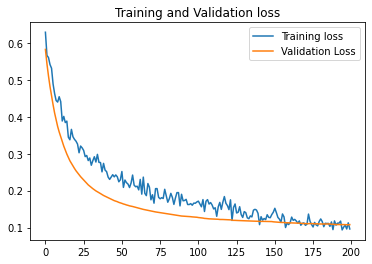

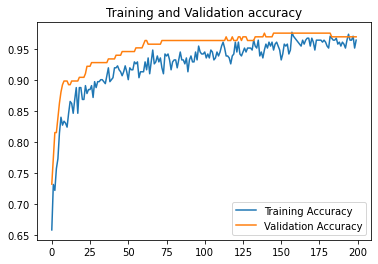

6/6 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9702
Test Loss: 0.10786779969930649
Test Accuracy: 0.9702380895614624


In [26]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Compilazione del modello
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


In [32]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 32)                11520     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


1 layer with regularization (RMS)

Epoch 1/200
63/63 [==============================] - 3s 12ms/step - loss: 0.8565 - accuracy: 0.3003 - val_loss: 0.8184 - val_accuracy: 0.3393
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.4026 - val_loss: 0.7533 - val_accuracy: 0.4464
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.4760 - val_loss: 0.6953 - val_accuracy: 0.5774
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6070 - val_loss: 0.6417 - val_accuracy: 0.6667
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.7093 - val_loss: 0.5949 - val_accuracy: 0.7560
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7827 - val_loss: 0.5529 - val_accuracy: 0.7917
Epoch 7/200
63/63 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.8179 - val_loss: 0.5148 - val_accuracy: 0.8214
Epoch 8/200


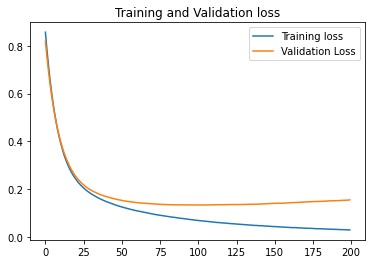

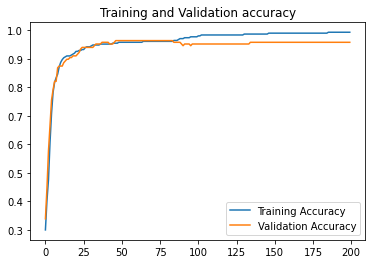

6/6 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.9583
Test Loss: 0.1557110697031021
Test Accuracy: 0.9583333134651184


In [30]:
from keras import regularizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]), activity_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1 layer with regularization (Adam)

Epoch 1/200
63/63 [==============================] - 3s 13ms/step - loss: 0.6791 - accuracy: 0.6134 - val_loss: 0.6022 - val_accuracy: 0.7381
Epoch 2/200
63/63 [==============================] - 0s 5ms/step - loss: 0.6268 - accuracy: 0.6901 - val_loss: 0.5610 - val_accuracy: 0.7798
Epoch 3/200
63/63 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.7508 - val_loss: 0.5244 - val_accuracy: 0.8095
Epoch 4/200
63/63 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.7891 - val_loss: 0.4914 - val_accuracy: 0.8214
Epoch 5/200
63/63 [==============================] - 0s 5ms/step - loss: 0.5047 - accuracy: 0.8115 - val_loss: 0.4624 - val_accuracy: 0.8571
Epoch 6/200
63/63 [==============================] - 0s 6ms/step - loss: 0.4724 - accuracy: 0.8403 - val_loss: 0.4361 - val_accuracy: 0.8869
Epoch 7/200
63/63 [==============================] - 0s 7ms/step - loss: 0.4434 - accuracy: 0.8530 - val_loss: 0.4126 - val_accuracy: 0.8929
Epoch 8/200


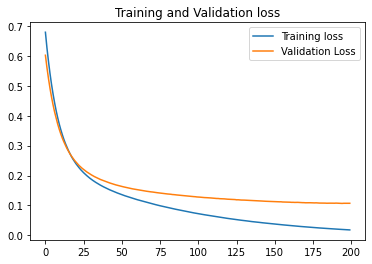

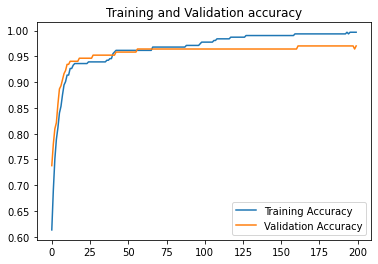

6/6 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9702
Test Loss: 0.10723589360713959
Test Accuracy: 0.9702380895614624


In [29]:
from keras import regularizers

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]), activity_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [31]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 32)                11520     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


2 layers + Dropout

Epoch 1/200
63/63 [==============================] - 6s 25ms/step - loss: 0.6943 - accuracy: 0.4696 - val_loss: 0.6937 - val_accuracy: 0.4881
Epoch 2/200
63/63 [==============================] - 1s 14ms/step - loss: 0.6934 - accuracy: 0.5144 - val_loss: 0.6928 - val_accuracy: 0.5298
Epoch 3/200
63/63 [==============================] - 1s 14ms/step - loss: 0.6924 - accuracy: 0.6038 - val_loss: 0.6917 - val_accuracy: 0.6429
Epoch 4/200
63/63 [==============================] - 1s 15ms/step - loss: 0.6910 - accuracy: 0.6358 - val_loss: 0.6901 - val_accuracy: 0.7024
Epoch 5/200
63/63 [==============================] - 1s 16ms/step - loss: 0.6898 - accuracy: 0.6741 - val_loss: 0.6882 - val_accuracy: 0.7738
Epoch 6/200
63/63 [==============================] - 1s 15ms/step - loss: 0.6882 - accuracy: 0.6965 - val_loss: 0.6860 - val_accuracy: 0.8155
Epoch 7/200
63/63 [==============================] - 1s 15ms/step - loss: 0.6863 - accuracy: 0.7284 - val_loss: 0.6831 - val_accuracy: 0.8333
Epoch 

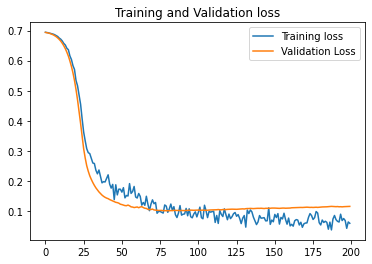

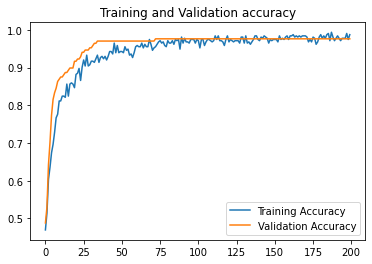

6/6 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9762
Test Loss: 0.11576474457979202
Test Accuracy: 0.976190447807312


In [33]:
from keras import optimizers

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
model.add(layers.Reshape((model.output_shape[1], 1)))
model.add(layers.GRU(16))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Utilizzo della binary cross-entropy per un problema di classificazione binaria

history = model.fit(x_train, y_train, batch_size=5, epochs=200, validation_data=(x_val, y_val))

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Implementing GRU with k-fold
Loss: 0.0552, Accuracy: 98.57%
Loss: 0.1075, Accuracy: 94.29%
Loss: 0.0281, Accuracy: 100.00%
Loss: 0.0833, Accuracy: 97.14%
Loss: 0.1264, Accuracy: 94.29%
Loss: 0.1720, Accuracy: 94.29%
Loss: 0.2153, Accuracy: 94.29%
Loss: 0.0561, Accuracy: 98.57%
Average accuracy: 0.9643
Average loss: 0.1055
(200,)


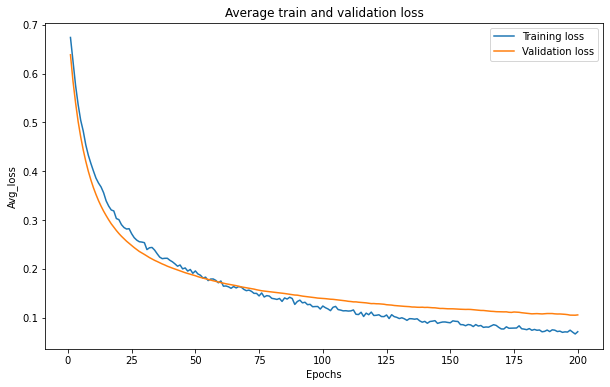

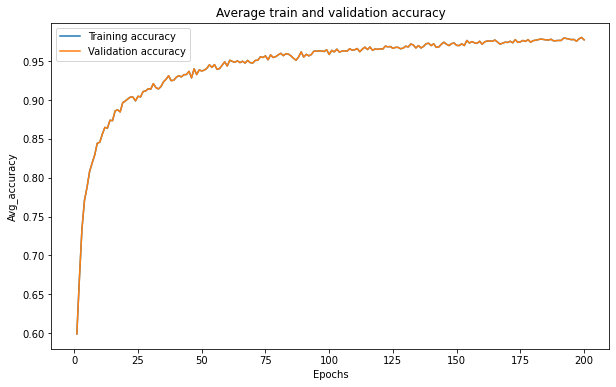

In [37]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 8  # numero di fold
kf = KFold(n_splits=k, shuffle = True)

# Array per memorizzare le curve di apprendimento
val_loss = []
val_acc = []
train_loss = []
train_acc = []

test_acc = []
test_loss = []

f = pd.DataFrame(columns = perfInd)
print('Implementing GRU with k-fold')

for train, test in kf.split(ft):
    x_train = ft.iloc[train,:ft.shape[1]-1]
    x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
    y_train = ft.loc[train,'seizure'].values.astype(int)
    x_test = ft.iloc[test,:ft.shape[1]-1]
    x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
    y_test = ft.loc[test,'seizure'].values.astype(int)

    model = Sequential()
    model.add(layers.GRU(32, dropout=0.3, recurrent_dropout=0.3, input_shape=(None, x_train.shape[-1])))
    model.add(layers.Dense(1, activation='sigmoid'))


    optimizer = optimizers.Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size = 5, epochs = 200, verbose = 0, validation_data=(x_test,y_test))

    
    train_loss.append(history.history['loss'])
    train_acc.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_accuracy'])

    # Valuta il modello
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_acc.append(accuracy)
    test_loss.append(loss)

    # Stampa i risultati di accuracy e loss per la k-esima fold
    print("Loss: {:.4f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))



 # Calculate average performance
avg_accuracy = np.mean(test_acc)
avg_loss = np.mean(test_loss)
print(f'Average accuracy: {avg_accuracy:.4f}')
print(f'Average loss: {avg_loss:.4f}')



avg_train_loss = np.mean(train_loss, axis=0)
avg_train_acc = np.mean(train_acc, axis=0)
avg_val_loss = np.mean(val_loss, axis=0)
avg_val_acc = np.mean(train_acc, axis=0)
print(np.shape(avg_train_loss))

# Plot delle curve di apprendimento mediate sulle K fold

epochs = range(1, len(train_loss[0]) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_loss, label='Training loss')
plt.plot(epochs, avg_val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Avg_loss')
plt.title('Average train and validation loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_acc, label='Training accuracy')
plt.plot(epochs, avg_val_acc, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Avg_accuracy')
plt.title('Average train and validation accuracy')
plt.legend()
plt.show()


K fold cross validation (1 layer - optimizer SGD)

Implementing GRU with k-fold
Loss: 0.2418, Accuracy: 91.43%
Loss: 0.1330, Accuracy: 95.71%
Loss: 0.2368, Accuracy: 90.00%
Loss: 0.1561, Accuracy: 95.71%
Loss: 0.1851, Accuracy: 90.00%
Loss: 0.2093, Accuracy: 95.71%
Loss: 0.1938, Accuracy: 91.43%
Loss: 0.1047, Accuracy: 98.57%
Average accuracy: 0.9357
Average loss: 0.1826
(200,)


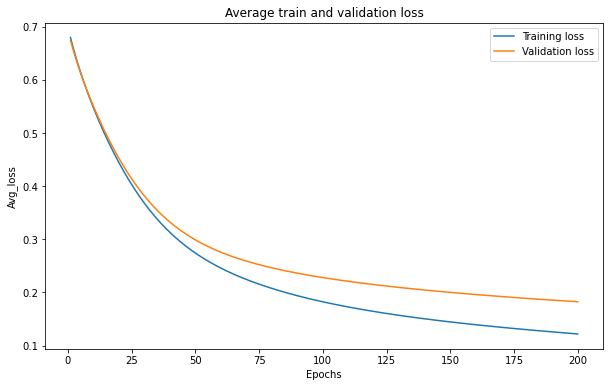

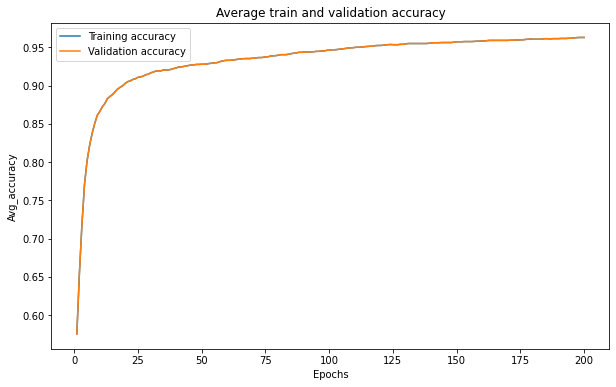

In [41]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 8  # numero di fold
kf = KFold(n_splits=k, shuffle = True)

# Array per memorizzare le curve di apprendimento
val_loss = []
val_acc = []
train_loss = []
train_acc = []

test_acc = []
test_loss = []

f = pd.DataFrame(columns = perfInd)
print('Implementing GRU with k-fold')

for train, test in kf.split(ft):
    x_train = ft.iloc[train,:ft.shape[1]-1]
    x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
    y_train = ft.loc[train,'seizure'].values.astype(int)
    x_test = ft.iloc[test,:ft.shape[1]-1]
    x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
    y_test = ft.loc[test,'seizure'].values.astype(int)

    model = Sequential()
    model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]),return_sequences=True))
    model.add(layers.GRU(16))
    model.add(layers.Dense(1, activation='sigmoid'))

    initial_learning_rate = 0.001
    optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

    decay_steps = 1000 
    decay_rate = 0.1 
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size = 5, epochs = 200, verbose = 0, validation_data=(x_test,y_test))

    
    train_loss.append(history.history['loss'])
    train_acc.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_accuracy'])

    # Valuta il modello
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_acc.append(accuracy)
    test_loss.append(loss)

    # Stampa i risultati di accuracy e loss per la k-esima fold
    print("Loss: {:.4f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))



 # Calculate average performance
avg_accuracy = np.mean(test_acc)
avg_loss = np.mean(test_loss)
print(f'Average accuracy: {avg_accuracy:.4f}')
print(f'Average loss: {avg_loss:.4f}')



avg_train_loss = np.mean(train_loss, axis=0)
avg_train_acc = np.mean(train_acc, axis=0)
avg_val_loss = np.mean(val_loss, axis=0)
avg_val_acc = np.mean(train_acc, axis=0)
print(np.shape(avg_train_loss))

# Plot delle curve di apprendimento mediate sulle K fold

epochs = range(1, len(train_loss[0]) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_loss, label='Training loss')
plt.plot(epochs, avg_val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Avg_loss')
plt.title('Average train and validation loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_acc, label='Training accuracy')
plt.plot(epochs, avg_val_acc, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Avg_accuracy')
plt.title('Average train and validation accuracy')
plt.legend()
plt.show()

Implementing GRU with k-fold
Loss: 0.6094, Accuracy: 82.86%
Loss: 0.5606, Accuracy: 84.29%
Loss: 0.6578, Accuracy: 87.14%
Loss: 0.6792, Accuracy: 67.14%
Loss: 0.6539, Accuracy: 77.14%
Loss: 0.6638, Accuracy: 72.86%
Loss: 0.6843, Accuracy: 67.14%
Loss: 0.6891, Accuracy: 55.71%
Average accuracy: 0.7429
Average loss: 0.6497
(200,)


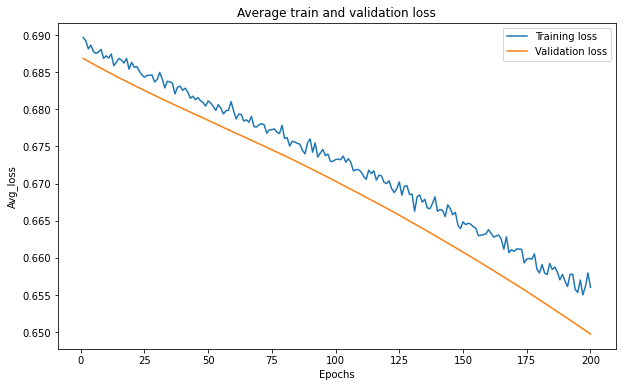

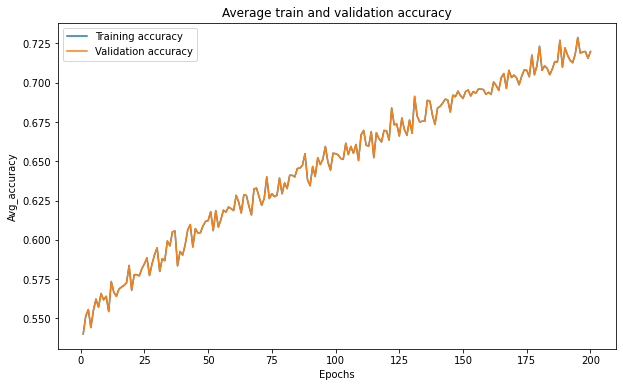

In [70]:
k = 8  # numero di fold
kf = KFold(n_splits=k, shuffle = True)

# Array per memorizzare le curve di apprendimento
val_loss = []
val_acc = []
train_loss = []
train_acc = []

test_acc = []
test_loss = []

f = pd.DataFrame(columns = perfInd)
print('Implementing GRU with k-fold')

for train, test in kf.split(ft):
    x_train = ft.iloc[train,:ft.shape[1]-1]
    x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
    y_train = ft.loc[train,'seizure'].values.astype(int)
    x_test = ft.iloc[test,:ft.shape[1]-1]
    x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
    y_test = ft.loc[test,'seizure'].values.astype(int)

    
    model = Sequential()
    model.add(layers.GRU(32, 
                     dropout=0.3,
                     recurrent_dropout=0.3,
                     input_shape=(None, x_train.shape[-1])))
    model.add(layers.Reshape((model.output_shape[1], 1)))
    model.add(layers.GRU(16))
    model.add(layers.Dense(1, activation='sigmoid'))


    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size = 5, epochs = 200, verbose = 0, validation_data=(x_test,y_test))

    
    train_loss.append(history.history['loss'])
    train_acc.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_accuracy'])

    # Valuta il modello
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_acc.append(accuracy)
    test_loss.append(loss)

    # Stampa i risultati di accuracy e loss per la k-esima fold
    print("Loss: {:.4f}, Accuracy: {:.2f}%".format(loss, accuracy * 100))



 # Calculate average performance
avg_accuracy = np.mean(test_acc)
avg_loss = np.mean(test_loss)
print(f'Average accuracy: {avg_accuracy:.4f}')
print(f'Average loss: {avg_loss:.4f}')



avg_train_loss = np.mean(train_loss, axis=0)
avg_train_acc = np.mean(train_acc, axis=0)
avg_val_loss = np.mean(val_loss, axis=0)
avg_val_acc = np.mean(train_acc, axis=0)
print(np.shape(avg_train_loss))

# Plot delle curve di apprendimento mediate sulle K fold

epochs = range(1, len(train_loss[0]) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_loss, label='Training loss')
plt.plot(epochs, avg_val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Avg_loss')
plt.title('Average train and validation loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_train_acc, label='Training accuracy')
plt.plot(epochs, avg_val_acc, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Avg_accuracy')
plt.title('Average train and validation accuracy')
plt.legend()
plt.show()

k fold crossvalidation 1 layer with dropout (old)

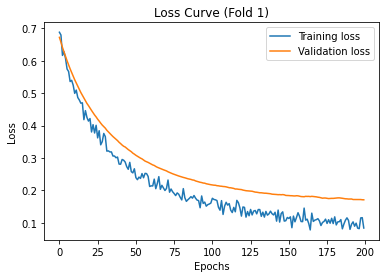

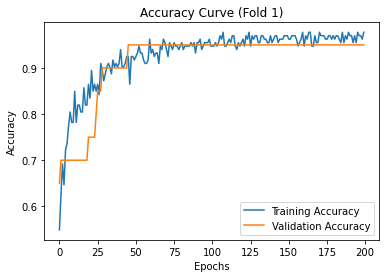

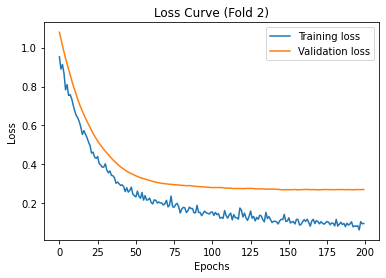

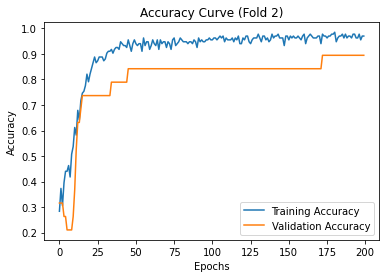

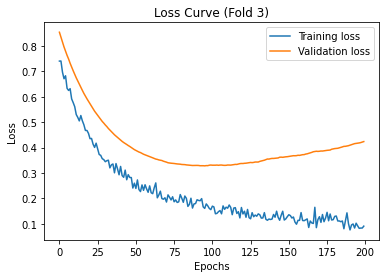

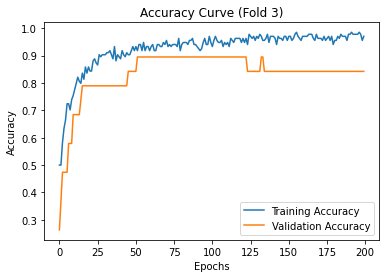

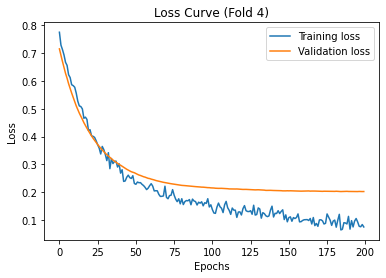

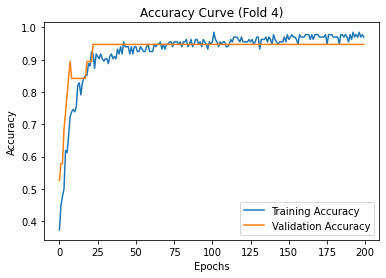

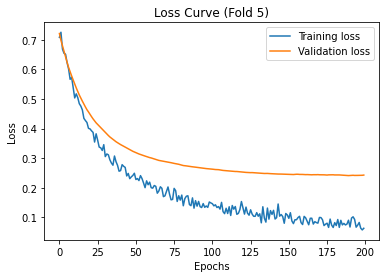

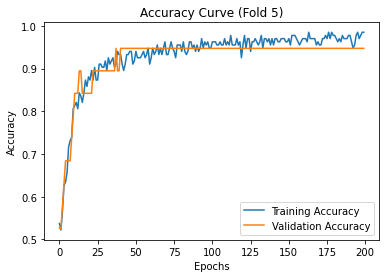

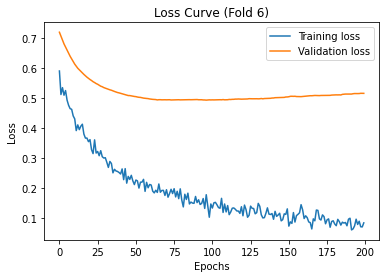

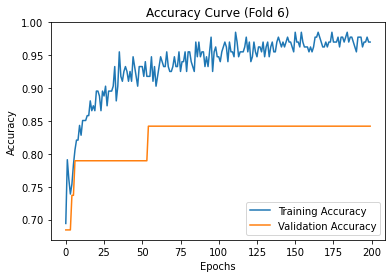

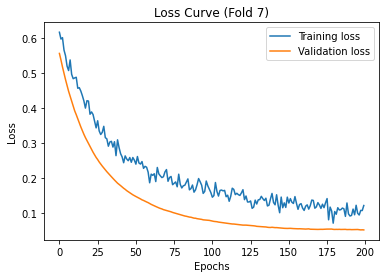

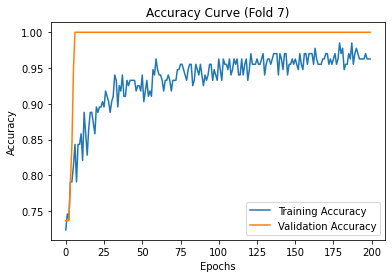

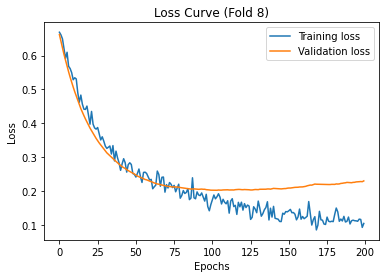

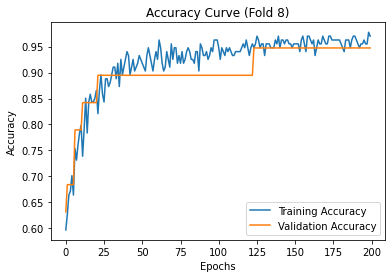

Mean Loss: 0.2633
Mean Accuracy: 0.9214


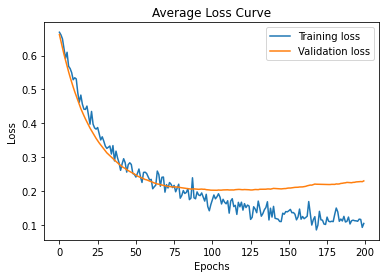

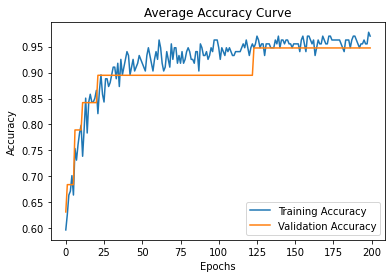

In [ ]:
from keras import optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the number of folds (K)
k = 8

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=200, verbose=0, validation_data=(x_val_fold, y_val_fold))


    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

    # Plot the loss curve for the current fold
    plt.figure()
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss Curve (Fold {})'.format(len(loss_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the accuracy curve for the current fold
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve (Fold {})'.format(len(acc_scores)))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Average Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Average Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Mean Loss: 0.2496
Mean Accuracy: 0.9125


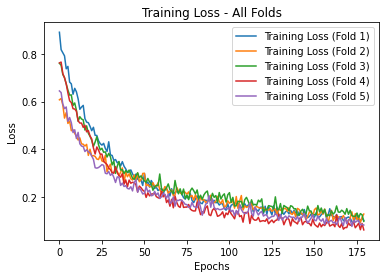

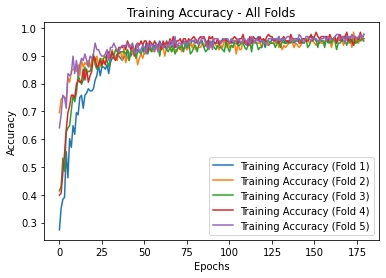

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import RMSprop

# Define the number of folds (K)
k = 5

# Create lists to store the evaluation metrics for each fold
loss_scores = []
acc_scores = []
history_list = []  # Add this line

# Create an instance of KFold with the desired number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for train_index, val_index in kfold.split(x_train):
    # Split the data into training set and validation set for the current fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, x_train.shape[-1])))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with the desired optimizer and loss function
    optimizer = RMSprop(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current training set
    history = model.fit(x_train_fold, y_train_fold, batch_size=5, epochs=180, verbose=0,
                        validation_data=(x_val_fold, y_val_fold))
    history_list.append(history)

    # Evaluate the model on the current validation set
    loss, acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)

    # Record the evaluation metrics for the current fold
    loss_scores.append(loss)
    acc_scores.append(acc)

# Calculate the mean of the evaluation metrics across folds
mean_loss = np.mean(loss_scores)
mean_acc = np.mean(acc_scores)

# Print the mean evaluation metrics
print("Mean Loss: {:.4f}".format(mean_loss))
print("Mean Accuracy: {:.4f}".format(mean_acc))

# Plot the average loss curve
plt.figure()
for i in range(len(loss_scores)):
    plt.plot(history_list[i].history['loss'], label='Training Loss (Fold {})'.format(i+1))
plt.title('Training Loss - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the average accuracy curve
plt.figure()
for i in range(len(acc_scores)):
    plt.plot(history_list[i].history['accuracy'], label='Training Accuracy (Fold {})'.format(i+1))
plt.title('Training Accuracy - All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
